# NCI Weather Bench  - 05

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import xesmf as xe
import dask.array as da
import glob
import matplotlib as mpl
import pprint 
import math

# Directories

In [2]:
NCI_dir = "/g/data/wb00/admin/testing/NCI_weatherbench/5.625deg"
wb_dir  = "/g/data/wb00/admin/testing/weatherbench/5.625deg"

def rmse (a, b):
    err2 = (((a - b)**2).sum())/len(a) 
    err  = err2**(1/2)   
    return err

err_vals  = []
year_vals = []

def yearly_rmse (p_name: str, p_id: str):
    for year in range (1979,2019):
        print (year, end= "") 
        file1 = wb_dir  + '/'+p_name+'/'+p_name+'_'+ str(year) + '_5.625deg.nc'
        ds_1 = xr.open_dataset(file1)
        file2 = NCI_dir + '/'+p_name+'/'+p_name+'_'+ str(year) + '_5.625deg.nc'
        ds_2 = xr.open_dataset(file2)
        err = 0 
        try:
            err = rmse (ds_1[p_id] ,ds_2[p_id]).values.item() 
        except ValueError:
            err = -0.05
            print(" (Error)", end = "")
        err_vals.append(err)
        year_vals.append(year)     
        del err   
        ds_1.close()
        ds_2.close()
        print (",", end= " ") 


def display_wb(file1, file2,  p_id, idx):  
    
    ds_1 = xr.open_dataset(file1)   
    ds_2 = xr.open_dataset(file2)
        
    fig = plt.figure(figsize=(20, 10))
    grid = plt.GridSpec(5, 2, wspace=0.1, hspace=0.8)
    plt.subplot(grid[0:2, 0:3])
    plt.bar(year_vals,  height = err_vals, align='edge', width = 0.3, color='gray',label='RMSE' )
    plt.margins(x=0)
    plt.xticks(year_vals)
    plt.xlabel("Years")
    plt.ylabel("RMSE")
    ax1 = plt.subplot(grid[2:, 0])
    plt.title(file1[:49] +'\n'+ file1[49:])
    im1 = plt.imshow(ds_1[p_id] [idx], origin ='lower')
    plt.colorbar(im1, orientation = 'horizontal', ticklocation = 'top', fraction=0.05, pad=0.06, aspect=80)
    ax2 = plt.subplot(grid[2:, 1])
    plt.title(file2[:53] +'\n'+ file2[53:])
    im2 = plt.imshow(ds_2[p_id] [idx],  origin ='lower')
    plt.colorbar(im2, orientation = 'horizontal', ticklocation = 'top', fraction=0.05, pad=0.06, aspect=80)
    plt.show()  
    ds_1.close()
    ds_2.close()          
        
        
def display_compare(year_vals, err_vals):  
    
    fig = plt.figure(figsize=(20, 10))
    grid = plt.GridSpec(5, 2, wspace=0.1, hspace=0.8)
    plt.subplot(grid[0:2, 0:3])
    plt.bar(year_vals,  height = err_vals, align='edge', width = 0.3, color='gray',label='RMSE' )
    plt.margins(x=0)
    plt.xticks(year_vals)
    plt.xlabel("Years")
    plt.ylabel("RMSE")
    
def display_cosntants(file1, file2, p_id):

    ds_1 = xr.open_dataset(file1)   
    ds_2 = xr.open_dataset(file2)
        
    fig = plt.figure(figsize=(20, 10))
    grid = plt.GridSpec(1, 2, wspace=0.1, hspace=0.8)

    ax1 = plt.subplot(grid[0, 0])
    plt.title(file1[:49] +''+ file1[49:])
    im1 = plt.imshow(ds_1[p_id], origin ='lower')
    plt.colorbar(im1, orientation = 'horizontal', ticklocation = 'top', fraction=0.05, pad=0.06, aspect=80)
    ax2 = plt.subplot(grid[0, 1])
    plt.title(file2[:53] +''+ file2[53:])
    im2 = plt.imshow(ds_2[p_id],  origin ='lower')
    plt.colorbar(im2, orientation = 'horizontal', ticklocation = 'top', fraction=0.05, pad=0.06, aspect=80)
    plt.show()  
    ds_1.close()
    ds_2.close()     
    
    
def display_pressure_level(file1, file2, p_id, time, level):

    ds_1 = xr.open_dataset(file1)   
    ds_2 = xr.open_dataset(file2)
        
    fig = plt.figure(figsize=(20, 10))
    grid = plt.GridSpec(1, 2, wspace=0.1, hspace=0.8)

    ax1 = plt.subplot(grid[0, 0])
    plt.title(file1[:49] +'\n'+ file1[49:])
    im1 = plt.imshow(ds_1[p_id][time][level], origin ='lower')
    plt.colorbar(im1, orientation = 'horizontal', ticklocation = 'top', fraction=0.05, pad=0.06, aspect=80)
    ax2 = plt.subplot(grid[0, 1])
    plt.title(file2[:53] +'\n'+ file2[53:])
    im2 = plt.imshow(ds_2[p_id][time][level],  origin ='lower')
    plt.colorbar(im2, orientation = 'horizontal', ticklocation = 'top', fraction=0.05, pad=0.06, aspect=80)
    plt.show()  
    ds_1.close()
    ds_2.close()    
    
def display_single_level(file1, file2, p_id, time):

    ds_1 = xr.open_dataset(file1)   
    ds_2 = xr.open_dataset(file2)
        
    fig = plt.figure(figsize=(20, 10))
    grid = plt.GridSpec(1, 2, wspace=0.1, hspace=0.8)

    ax1 = plt.subplot(grid[0, 0])
    plt.title(file1[:49] +'\n'+ file1[49:])
    im1 = plt.imshow(ds_1[p_id][time], origin ='lower')
    plt.colorbar(im1, orientation = 'horizontal', ticklocation = 'top', fraction=0.05, pad=0.06, aspect=80)
    ax2 = plt.subplot(grid[0, 1])
    plt.title(file2[:53] +'\n'+ file2[53:])
    im2 = plt.imshow(ds_2[p_id][time],  origin ='lower')
    plt.colorbar(im2, orientation = 'horizontal', ticklocation = 'top', fraction=0.05, pad=0.06, aspect=80)
    plt.show()  
    ds_1.close()
    ds_2.close()            
    
        

In [146]:
!ls -hl {NCI_dir}

total 674K
drwxrws---+ 2 mah900 wb00 41K Apr 30 19:26 10m_u_component_of_wind
drwxrws---+ 2 mah900 wb00 41K Apr 30 21:36 10m_v_component_of_wind
drwxrws---+ 2 mah900 wb00 41K Apr 30 17:06 2m_temperature
-rw-rw----+ 1 mah900 wb00 67K May  1 20:23 constants.nc
drwxrws---+ 2 mah900 wb00 41K Apr 28 21:48 geopotential
drwxrws---+ 2 mah900 wb00 41K Apr 29 20:00 potential_vorticity
drwxrws---+ 2 mah900 wb00 41K Apr 28 11:57 relative_humidity
drwxrws---+ 2 mah900 wb00 41K Apr 30 00:18 specific_humidity
drwxrws---+ 2 mah900 wb00 41K Apr 27 19:22 temperature
drwxrws---+ 2 mah900 wb00 41K May  1 13:50 total_cloud_cover
drwxrws---+ 2 mah900 wb00 41K May  1 21:07 total_precipitation
drwxrws---+ 2 mah900 wb00 41K Apr 29 17:06 u_component_of_wind
drwxrws---+ 2 mah900 wb00 41K Apr 29 13:38 v_component_of_wind
drwxrws---+ 2 mah900 wb00 41K Apr 30 09:10 vorticity


# toa_incident_solar_radiation

In [3]:
year = 1979
file1 = wb_dir + '/toa_incident_solar_radiation/toa_incident_solar_radiation_'+ str(year) + '_5.625deg.nc'
file2 = NCI_dir + '/toa_incident_solar_radiation/toa_incident_solar_radiation_'+ str(year) + '_5.625deg.nc'
ds_1 = xr.open_dataset(file1) 
ds_1 

NameError: name 'wb_dir' is not defined

In [6]:
#rt52_tisr_dir = "/g/data/rt52/era5/single-levels/monthly-averaged-by-hour/tisr/1979/*"
#tisr_1 = xr.open_mfdataset(rt52_tisr_dir)
#tisr_1.time[0:100]

In [14]:
wb00_tisr_dir = "/g/data/wb00/admin/testing/cds_era5/*"
tisr_2 = xr.open_mfdataset(wb00_tisr_dir)
tisr_2 

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 8760)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1979-01-01 ... 1979-12-31T23:00:00
Data variables:
    tisr       (time, latitude, longitude) float32 dask.array<chunksize=(8760, 721, 1440), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2023-05-17 23:14:17 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [16]:
import cdsapi
c = cdsapi.Client()
#import pp

In [51]:
dir_path = "/g/data/wb00/admin/testing/cds_era5/single-levels/reanalysis/tisr/1979/"
file_path = dir_path + 'tisr_era5_oper_sfc_19790101-19790131.nc'
#file_path = dir_path + 'tisr_era5_oper_sfc_19790201-19790228.nc'
file_path = dir_path + 'tisr_era5_oper_sfc_19791201-19791231.nc'


tisr_1 = xr.open_mfdataset(file_path)
tisr_1 

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 744)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1979-12-01 ... 1979-12-31T23:00:00
Data variables:
    tisr       (time, latitude, longitude) float32 dask.array<chunksize=(744, 721, 1440), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2023-05-18 14:06:49 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [48]:
dir_path = "/g/data/rt52/era5/single-levels/reanalysis/tcc/1979/"
file_path = dir_path + 'tcc_era5_oper_sfc_19790101-19790131.nc'



tisr_1 = xr.open_mfdataset(file_path)
tisr_1 

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 744)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1979-01-01 ... 1979-01-31T23:00:00
Data variables:
    tcc        (time, latitude, longitude) float32 dask.array<chunksize=(744, 721, 1440), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2020-10-04 20:18:34 UTC+1100 by era5_replication_tools-1.2....
    license:      Licence to use Copernicus Products: https://apps.ecmwf.int/...
    summary:      ERA5 is the fifth generation ECMWF atmospheric reanalysis o...
    title:        ERA5 single-levels reanalysis total_cloud_cover 19790101-19...

In [43]:

def hourly_rmse_single (dir_wb, dir_NCI, p_name, p_id, year1, year2):
    rmse_list = []
    #time_list = []
    years_wb = []
    years_NCI = []
    for year in range (year1, year2+1): 
        years_wb.append  (dir_wb  + '/'+p_name+'/'+p_name+'_'+ str(year) + '_5.625deg.nc')
        years_NCI.append (dir_NCI + '/'+p_name+'/'+p_name+'_'+ str(year) + '_5.625deg.nc')
        
    #pprint.pprint (file1_years)  
    #pprint.pprint (file2_years) 

    ds_wb  = xr.open_mfdataset(years_wb )
    ds_NCI = xr.open_mfdataset(years_NCI) 
    
    ds_wb  =  ds_wb[p_id] .resample(time='24H').mean()
    ds_NCI =  ds_NCI[p_id].resample(time='24H').mean()
    
    date_times = ds_wb.time
    #print(date_times[:4])
    
    for dt in date_times[:83]:
        RMSE = -1.0
        try:
             RMSE = math.sqrt(  np.square(np.subtract(ds_wb.sel(time=dt) , ds_NCI.sel(time=dt))).mean() )
        except:
             RMSE = -0.1
        rmse_list.append(RMSE)    
    
    #def rmse_by_hour(dt):
    #    try:
    #        MSE = np.square(np.subtract(ds_wb["tp"].sel(time=dt) , ds_NCI["tp"].sel(time=dt))).mean() 
    #        return math.sqrt(MSE)  
    #    except:
    #        return -0.1
    #date_times = ds_wb.time
    #err_list = list(map( rmse_by_hour, date_times[:2000] ))
    
       
    ##i = 0
    #for dt in date_times:
    ##    #print (dt)
    #    err = -1.0
    #    try:
    #        #v1 = ds_wb["tp"].sel(time=dt) 
    #        #v2 = ds_NCI["tp"].sel(time=dt)
    #        #MSE = np.square(np.subtract(v1, v2)).mean() 
    #        MSE = np.square(np.subtract(ds_wb.sel(time=dt) , ds_NCI.sel(time=dt))).mean() 
    #        RMSE = math.sqrt(MSE)
    #        #print ('{:.10f}'.format(RMSE) )
    #    except:
    #        err = -0.1
    #    err_list.append(RMSE)
    #    time_list.append(dt)
    #    #time_list.append(i)
    #    
    #    i += 1
   
    #diff = (ds_wb - ds_NCI )
    #print (ds_wb)
    ds_wb.close()
    ds_NCI.close()
     
    return rmse_list, date_times[:83] # time_list
    
def display_hourly_rmse(time_list, err_list):  
    
    fig = plt.figure(figsize=(20, 10))
    grid = plt.GridSpec(5, 2, wspace=0.1, hspace=0.8)
    plt.subplot(grid[0:2, 0:3])
    plt.bar(time_list,  height = err_list, align='edge', width = 0.1, color='gray',label='RMSE' )
    plt.margins(x=0)
    #plt.xticks(time_list)
    plt.xlabel("Time")
    plt.ylabel("RMSE")
    plt.show()
        
    

In [44]:
%%time
NCI_dir = "/g/data/wb00/admin/testing/NCI_weatherbench/5.625deg"
wb_dir  = "/g/data/wb00/admin/testing/weatherbench/5.625deg"
p_name = 'total_precipitation'
p_id   = 'tp'
year1 = 1979
year2 = 2018
rmse_list, time_list = hourly_rmse_single (wb_dir, NCI_dir, p_name, p_id, year1, year2)
print (type(rmse_list))
print (type(time_list))
# 2000, loop:39 sec, list comprehension:42 sec, map - generator: 1.15 sec, map - list 41.2 sec

<class 'list'>
<class 'xarray.core.dataarray.DataArray'>
CPU times: user 4min 46s, sys: 1.55 s, total: 4min 48s
Wall time: 4min 47s


In [25]:
%%time
display_hourly_rmse(time_list, err_list)

CPU times: user 2.58 s, sys: 19.7 ms, total: 2.6 s
Wall time: 2.6 s


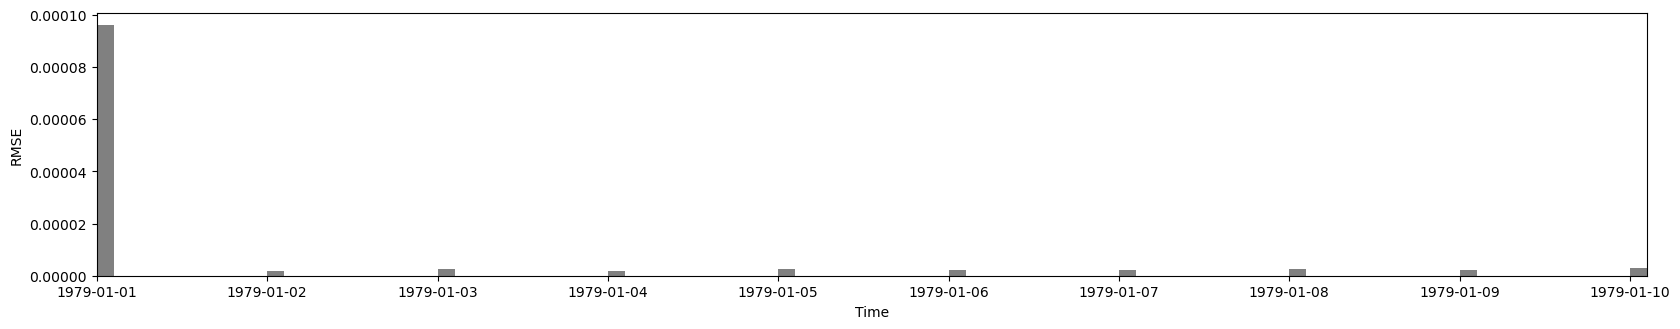

CPU times: user 202 ms, sys: 2.42 ms, total: 204 ms
Wall time: 257 ms


In [42]:
%%time
display_hourly_rmse(time_list, rmse_list)

In [34]:
print (err_list)

[9.592601425416218e-05, 1.9616852647108314e-06, 2.6506904828229152e-06, 1.9080414282683258e-06]


### Both hourly and daily mean takes a lot of time, using monthy instead (takes the smae time)

In [51]:

def monthly_rmse_single (dir_wb, dir_NCI, p_name, p_id, year1, year2):
    rmse_list = []
    #time_list = []
    years_wb = []
    years_NCI = []
    for year in range (year1, year2+1): 
        years_wb.append  (dir_wb  + '/'+p_name+'/'+p_name+'_'+ str(year) + '_5.625deg.nc')
        years_NCI.append (dir_NCI + '/'+p_name+'/'+p_name+'_'+ str(year) + '_5.625deg.nc')
        
    #pprint.pprint (file1_years)  
    #pprint.pprint (file2_years) 

    ds_wb  = xr.open_mfdataset(years_wb )
    ds_NCI = xr.open_mfdataset(years_NCI) 
    
    ds_wb  =  ds_wb[p_id]  #.resample(time="1MS").mean(dim="time")  
    ds_NCI =  ds_NCI[p_id] #.resample(time="1MS").mean(dim="time") 
    
    date_times = ds_wb.time
    #print(date_times[:4])
    
    for dt in date_times[:8760]:
        RMSE = -1.0
        try:
             RMSE = math.sqrt(  np.square(np.subtract(ds_wb.sel(time=dt) , ds_NCI.sel(time=dt))).mean() )
        except:
             RMSE = -0.1
        rmse_list.append(RMSE)    
    
    #def rmse_by_hour(dt):
    #    try:
    #        MSE = np.square(np.subtract(ds_wb["tp"].sel(time=dt) , ds_NCI["tp"].sel(time=dt))).mean() 
    #        return math.sqrt(MSE)  
    #    except:
    #        return -0.1
    #date_times = ds_wb.time
    #err_list = list(map( rmse_by_hour, date_times[:2000] ))
    
       
    ##i = 0
    #for dt in date_times:
    ##    #print (dt)
    #    err = -1.0
    #    try:
    #        #v1 = ds_wb["tp"].sel(time=dt) 
    #        #v2 = ds_NCI["tp"].sel(time=dt)
    #        #MSE = np.square(np.subtract(v1, v2)).mean() 
    #        MSE = np.square(np.subtract(ds_wb.sel(time=dt) , ds_NCI.sel(time=dt))).mean() 
    #        RMSE = math.sqrt(MSE)
    #        #print ('{:.10f}'.format(RMSE) )
    #    except:
    #        err = -0.1
    #    err_list.append(RMSE)
    #    time_list.append(dt)
    #    #time_list.append(i)
    #    
    #    i += 1
   
    #diff = (ds_wb - ds_NCI )
    #print (ds_wb)
    ds_wb.close()
    ds_NCI.close()
     
    return rmse_list, date_times[:8760] # time_list
    
def display_hourly_rmse(time_list, err_list):  
    
    fig = plt.figure(figsize=(20, 10))
    grid = plt.GridSpec(5, 2, wspace=0.1, hspace=0.8)
    plt.subplot(grid[0:2, 0:3])
    plt.bar(time_list,  height = err_list, align='edge', width = 0.1, color='gray',label='RMSE' )
    plt.margins(x=0)
    #plt.xticks(time_list)
    plt.xlabel("Time")
    plt.ylabel("RMSE")
    plt.show()
        
    

In [ ]:
%%time
NCI_dir = "/g/data/wb00/admin/testing/NCI_weatherbench/5.625deg"
wb_dir  = "/g/data/wb00/admin/testing/weatherbench/5.625deg"
p_name = 'total_precipitation'
p_id   = 'tp'
year1 = 1979
year2 = 2018
rmse_list, time_list = hourly_rmse_single (wb_dir, NCI_dir, p_name, p_id, year1, year2)
print (type(rmse_list))
print (type(time_list))

In [49]:
%%time
display_hourly_rmse(time_list, rmse_list)

CPU times: user 400 ms, sys: 29.7 ms, total: 429 ms
Wall time: 1.56 s
